# Research

In [66]:
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt

In [67]:
df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).ffill().dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)
df_trading_signal = pd.read_csv("ft_trading_signals.csv", index_col=0)
df_trading_signal.index.name = 'Code'

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

df_perform = df_perform[df_perform['currency'].isin(['EUR','USD'])]

df_perform = df_perform[~df_perform.index.str.startswith("PT")]

### Short term

In [68]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0823415012,-0.0563,-0.3116,-0.4145,-0.0896,-0.0714,-0.0214,Sector Equity Alternative Energy,BNP Paribas Funds Energy TransitionN Capitalis...,EUR,1,7,0.000000,0.055493,0.067141
LU0067412154,-0.0614,-0.1745,-0.1203,-0.0334,0.1434,0.0740,China Equity,UBS (Lux) Equity Fund - China Opportunity (USD...,USD,4,6,0.000000,0.052562,0.111003
LU0650958076,0.0363,-0.0402,0.2420,0.2611,0.1381,0.0401,Global Emerging Markets Equity,Fidelity Active Strategy - FAST - Emerging Mar...,EUR,2,6,-0.008367,0.047167,0.067882
LU0823433858,0.2054,0.3994,0.6528,0.2753,0.1750,0.1786,Turkey Equity,BNP Paribas Funds Turkey EquityNR,EUR,3,7,0.000000,0.046541,0.073294
LU0650957938,0.0443,-0.0331,0.2502,0.2710,0.1370,0.0409,Global Emerging Markets Equity,Fidelity Active Strategy - FAST - Emerging Mar...,USD,3,6,-0.009038,0.046290,0.071567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU1255445170,0.0658,0.0346,0.0674,0.0693,-0.0196,-0.0488,Global Large-Cap Growth Equity,Ninety One Global Strategy Fund - Global Quali...,USD,3,6,0.000000,-0.023532,-0.007882
LU0426417589,0.0745,0.0406,0.0726,0.0750,-0.0202,-0.0488,Global Large-Cap Growth Equity,Ninety One Global Strategy Fund - Global Franc...,USD,4,6,0.000000,-0.023538,-0.007716
LU1951225553,0.0807,-0.0066,0.2282,0.1939,0.0281,-0.0587,Global Flex-Cap Equity,Natixis International Funds (Lux) I - Thematic...,EUR,3,6,0.000000,-0.023876,-0.007986
LU0994945656,0.0745,0.0407,0.0725,0.0750,-0.0202,-0.0489,Global Large-Cap Growth Equity,Ninety One Global Strategy Fund - Global Franc...,USD,4,6,0.000000,-0.024198,-0.008287


In [69]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0067412154,-0.0614,-0.1745,-0.1203,-0.0334,0.1434,0.0740,China Equity,UBS (Lux) Equity Fund - China Opportunity (USD...,USD,4,6,0.000000,0.052562,0.111003
LU0823433858,0.2054,0.3994,0.6528,0.2753,0.1750,0.1786,Turkey Equity,BNP Paribas Funds Turkey EquityNR,EUR,3,7,0.000000,0.046541,0.073294
LU0650957938,0.0443,-0.0331,0.2502,0.2710,0.1370,0.0409,Global Emerging Markets Equity,Fidelity Active Strategy - FAST - Emerging Mar...,USD,3,6,-0.009038,0.046290,0.071567
LU1989766289,0.0997,0.0252,-0.0033,0.1346,0.2167,0.1037,Sector Equity Precious Metals,CPR Invest - Global Gold Mines A USD Acc,USD,3,7,0.000000,0.045146,0.037560
LU1989765471,0.0996,0.0252,-0.0033,0.1347,0.2167,0.1037,Sector Equity Precious Metals,CPR Invest - Global Gold Mines A EUR Acc,EUR,3,7,0.000000,0.042760,0.030208
LU0638552439,-0.0379,-0.0375,-0.0714,-0.0467,-0.1393,0.0354,Africa Equity,BPI GIF Africa Class R EUR,EUR,3,5,0.000000,0.042328,0.049268
LU0503253931,0.0993,0.0008,0.0345,0.2027,0.2182,0.1082,Sector Equity Precious Metals,Invesco Funds - Invesco Gold & Special Mineral...,EUR,3,7,0.000000,0.040000,0.025729
LU0072913022,-0.0256,-0.1390,-0.0595,0.0181,0.1465,0.0622,Greater China Equity,UBS (Lux) Equity Fund - Greater China (USD) P-acc,USD,3,6,0.000000,0.039351,0.089746
LU0213962813,0.2860,0.4737,0.4898,0.2487,0.1457,0.1653,Turkey Equity,HSBC Global Investment Funds - Turkey Equity EC,EUR,4,7,0.000000,0.037570,0.068322
LU1146622755,-0.0235,-0.1662,-0.2223,-0.0656,0.1422,0.0469,China Equity - A Shares,Aberdeen Standard SICAV I - China A Share Sust...,USD,4,6,0.000000,0.036145,0.036977


In [70]:
df_perform[(df_perform['risk']<=3) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0459959929,0.0007,-0.0283,-0.0018,0.0407,0.0128,-0.0086,"Convertible Bond - Global, EUR Hedged",Candriam Bonds Convertible Defensive Class C E...,EUR,3,3,0.0,0.000154,0.009422
LU1548496022,0.0109,-0.0121,0.0487,0.0570,0.0025,-0.0155,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.0,0.002738,0.006505
LU1089088071,0.0109,-0.0121,0.0486,0.0570,0.0024,-0.0155,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.0,0.002728,0.006480
LU0986130309,-0.0060,-0.0620,-0.0202,0.0250,-0.0008,-0.0078,EUR Flexible Allocation - Global,Allianz Unconstrained Multi Asset Strategy CT2...,EUR,2,3,0.0,0.001017,0.005720
LU0514680072,-0.0094,-0.0265,-0.0145,0.0204,-0.0100,-0.0123,Global Flexible Bond - EUR Hedged,JPMorgan Funds - Global Strategic Bond Fund D ...,EUR,3,3,0.0,0.000276,0.004849
LU0514680155,-0.0094,-0.0265,-0.0143,0.0204,-0.0100,-0.0122,Global Flexible Bond - EUR Hedged,JPMorgan Funds - Global Strategic Bond Fund D ...,EUR,3,3,0.0,0.000385,0.004835
LU1832969650,0.0230,0.0176,0.0744,0.0413,0.0235,0.0057,Other Bond,Morgan Stanley Investment Funds - Euro Corpora...,EUR,5,3,0.0,0.000620,0.004357
LU1927799954,0.0144,-0.0072,0.0888,0.0616,-0.0003,-0.0027,EUR High Yield Bond,Nordea 1 - European High Yield Stars Bond Fund...,EUR,1,3,0.0,-0.003491,0.004222
LU0963986467,-0.0078,-0.0281,0.0040,0.0564,-0.0056,-0.0109,Global Flexible Bond - EUR Hedged,Mirabaud - Sustainable Global Strategic Bond F...,EUR,2,3,0.0,0.001933,0.004069
LU1480270641,-0.0041,-0.0128,0.0162,0.0181,0.0014,-0.0040,Global Flexible Bond - EUR Hedged,Allianz Global Investors Fund - Allianz Global...,EUR,3,3,0.0,0.000000,0.003885


### Category 

In [71]:
#df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].mean().rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].median().rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].median().rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].max().rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].count().rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].median().rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].max().rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].median().rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].max().rename('2 w max'))

In [72]:
df_cat_perform['1 w mean'].sort_values(ascending=False)[:20]

ft category
Turkey Equity                                   0.042055
Property - Indirect Eurozone                    0.028703
Property - Indirect Europe                      0.027456
China Equity - A Shares                         0.024339
Hong Kong Equity                                0.023855
Africa Equity                                   0.023539
Greater China Equity                            0.022445
Sector Equity Alternative Energy                0.022035
China Equity                                    0.020659
Global Emerging Markets Small/Mid-Cap Equity    0.017419
UK Flex-Cap Equity                              0.016542
Latin America Equity                            0.015369
Greater China Allocation                        0.014597
Sector Equity Precious Metals                   0.014304
Brazil Equity                                   0.014054
Asia ex-Japan Small/Mid-Cap Equity              0.013679
Asia-Pacific ex-Japan Equity                    0.012098
Global Emerging Mar

In [73]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Turkey Equity,0.2387,0.4164,0.4371,0.2389,0.1625,0.1723,0.000000,0.17195,0.0,0.1786,2.0,0.042055,0.046541,0.070808,0.073294
Property - Indirect Eurozone,-0.0706,-0.0844,-0.0234,0.0133,0.0891,0.0890,0.000000,0.00535,0.0,0.0119,2.0,0.028703,0.028708,0.054265,0.061128
Property - Indirect Europe,-0.0209,-0.0595,0.0975,0.1796,-0.0067,-0.0078,0.000000,-0.01460,0.0,-0.0003,5.0,0.027456,0.027958,0.044475,0.051535
China Equity - A Shares,-0.0056,-0.1183,-0.1495,-0.0232,0.1387,0.0405,0.000000,0.04380,0.0,0.0479,5.0,0.024339,0.036145,0.012987,0.036977
Hong Kong Equity,-0.0493,-0.1176,-0.1249,-0.0209,0.1352,0.0672,0.000000,0.06760,0.0,0.0692,2.0,0.023855,0.026715,0.073603,0.074958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Europe ex-UK Equity,0.0816,0.0570,0.0941,0.1663,0.0462,-0.0140,0.000000,-0.02795,0.0,0.0032,8.0,-0.009342,0.006499,0.003005,0.022277
SEK Bond - Short Term,-0.0135,-0.0430,-0.0200,0.0124,-0.0314,-0.0160,0.000000,-0.01770,0.0,-0.0177,1.0,-0.009434,-0.009434,-0.005413,-0.005413
Italy Equity,0.1028,0.1131,0.1846,0.2104,0.0902,-0.0080,-0.002163,-0.01640,0.0,0.0020,7.0,-0.010599,0.009204,0.017271,0.038537


In [74]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="2 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Hong Kong Equity,-0.0493,-0.1176,-0.1249,-0.0209,0.1352,0.0672,0.000000,0.06760,0.000000,0.0692,2.0,0.023855,0.026715,0.073603,0.074958
Turkey Equity,0.2387,0.4164,0.4371,0.2389,0.1625,0.1723,0.000000,0.17195,0.000000,0.1786,2.0,0.042055,0.046541,0.070808,0.073294
China Equity,-0.0442,-0.1583,-0.1131,-0.0093,0.1652,0.0617,0.000037,0.06225,0.000000,0.0810,32.0,0.020659,0.052562,0.064393,0.111003
Greater China Equity,-0.0086,-0.1241,-0.0246,0.0528,0.1370,0.0411,-0.000675,0.04460,0.000000,0.0622,9.0,0.022445,0.039351,0.055455,0.089746
Property - Indirect Eurozone,-0.0706,-0.0844,-0.0234,0.0133,0.0891,0.0890,0.000000,0.00535,0.000000,0.0119,2.0,0.028703,0.028708,0.054265,0.061128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NOK Bond,-0.0277,-0.0574,0.0046,0.0149,-0.0414,-0.0139,0.000000,-0.02270,0.000000,-0.0227,1.0,-0.005618,-0.005618,-0.008712,-0.008712
Sector Equity Communications,0.0509,0.0228,0.1844,0.1595,0.0059,-0.0205,-0.010811,-0.04480,-0.010811,-0.0448,1.0,-0.008429,-0.008429,-0.009025,-0.009025
Africa & Middle East Equity,0.0460,0.0780,0.0473,0.0658,0.0099,-0.0023,-0.000540,-0.02075,-0.000540,-0.0197,2.0,0.008211,0.008796,-0.009780,-0.004651


In [75]:
trendy_cat = df_cat_perform.apply(lambda x: x['1 w mean'] + x['1 m mean']*(1 if (x['1 w mean']<0 and x['1 m mean']<0) else -1)  ,axis=1).sort_values(ascending=False)[:10]
trendy_cat = df_cat_perform[df_cat_perform.apply(lambda x: (x['1 w mean'] > 0) and (x['1 m mean'] <0)  ,axis=1)][:20].sort_values(by=['2 w mean'],ascending=False)
trendy_cat

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Brazil Equity,-0.0141,0.0198,0.1438,0.0493,-0.0544,-0.0568,0.000000,-0.06665,0.00000,-0.0521,6.0,0.014054,0.023693,0.030253,0.042334
Asia-Pacific ex-Japan Equity Income,0.0350,0.0099,0.0645,0.1075,0.0655,0.0068,-0.001110,-0.00400,0.00000,0.0249,11.0,0.004882,0.021638,0.024471,0.047440
Asia-Pacific Equity,0.0367,-0.0176,0.0737,0.1149,0.0438,-0.0116,-0.001907,-0.01830,0.00000,-0.0022,5.0,0.001233,0.005804,0.021414,0.028134
Australia & New Zealand Equity,0.0888,0.0341,0.0635,0.1472,0.0324,-0.0086,0.000000,-0.01460,0.00000,-0.0146,1.0,0.002292,0.002292,0.018745,0.018745
EUR Aggressive Allocation,0.0340,0.0139,0.0609,0.1098,0.0265,-0.0099,0.000000,-0.00230,0.00000,-0.0023,1.0,0.006578,0.006578,0.017954,0.017954
Europe Equity Income,0.0561,0.0637,0.0767,0.1257,0.0406,0.0001,-0.001201,-0.00330,0.00000,0.0183,15.0,0.002704,0.013274,0.017820,0.035028
Europe Large-Cap Blend Equity,0.0687,0.0582,0.0763,0.1521,0.0447,-0.0090,-0.000278,-0.01050,0.00000,0.0072,61.0,0.001724,0.011661,0.017302,0.044899
Europe Flex-Cap Equity,0.0481,0.0136,0.0545,0.1549,0.0360,-0.0104,-0.000276,-0.00920,0.00000,0.0057,6.0,0.006434,0.012829,0.012612,0.028781
EUR Flexible Allocation - Global,0.0274,0.0050,0.0639,0.0888,0.0229,-0.0094,-0.000358,-0.01240,0.00000,0.0263,41.0,0.001785,0.007856,0.006154,0.022923


In [76]:
trendy_funds = set(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
#trendy_funds &= set(df_perform[df_perform['rating'] >= 3].index)
cats_to_ignore = []#['Sector Equity Precious Metals','Sector Equity Natural Resources']
#cats_to_ignore += ['Asia-Pacific ex-Japan Equity','Sector Equity Ecology','US Large-Cap Growth Equity']
trendy_funds |= set(df_perform[df_perform.groupby('ft category')['2 week'].transform('max')==df_perform['2 week']].index)
trendy_funds |= set(df_perform[df_perform['rating'] >= 5].index)
trendy_funds &= set(df_perform[~df_perform['ft category'].isin(cats_to_ignore)].index)
trendy_funds &= set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
print(len(trendy_funds))
df_perform[df_perform.index.isin(trendy_funds)].groupby('ft category')['1 week'].count().sort_values(ascending=False)[:20]

595


ft category
Other Equity                                 50
Global Emerging Markets Equity               27
USD Moderate Allocation                      22
Global Large-Cap Blend Equity                19
Sector Equity Technology                     16
Sector Equity Ecology                        16
EUR Moderate Allocation - Global             15
Global Emerging Markets Bond                 14
Global Large-Cap Growth Equity               14
Latin America Equity                         10
US Large-Cap Growth Equity                   10
Other Bond                                    9
Global Flex-Cap Equity                        9
US Large-Cap Blend Equity                     9
Global Flexible Bond - EUR Hedged             9
Global Emerging Markets Bond - EUR Biased     9
EUR Flexible Allocation - Global              9
Global Emerging Markets Allocation            7
Europe Large-Cap Blend Equity                 7
Global High Yield Bond - EUR Hedged           7
Name: 1 week, dtype: int64

[]

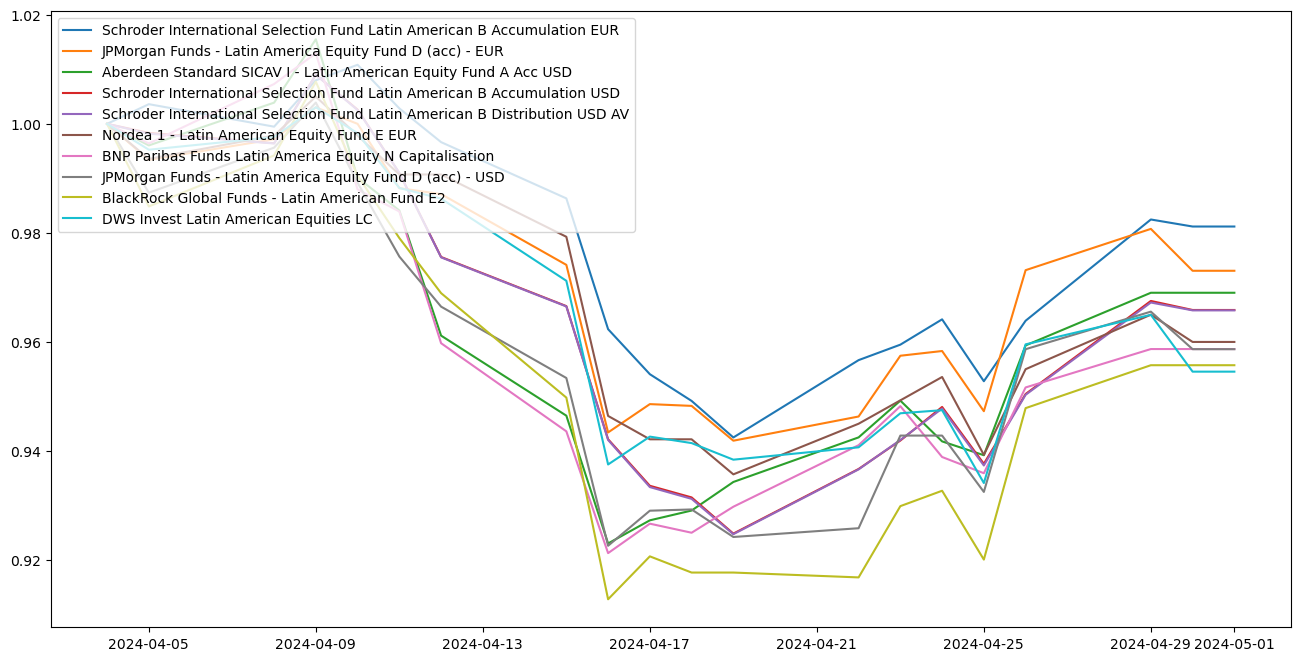

In [77]:
cats = ['Latin America Equity']
filter = df_perform['ft category'].isin(cats) & df_perform.index.isin(df_quotes.columns) & df_perform.index.isin(trendy_funds)
#filter &= df_perform.index.isin(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
df = df_quotes[df_perform[filter].index][-20:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()

In [78]:
df_trading_signal

,Trading Signal,Extreme Signal
Code,,
DE000A2DR2L2,1,-0.1
DE000A0X7541,1,0.0
DE000A1T73W9,1,0.2
LU1064047639,1,-0.3
LU1997245177,1,-0.1
...,...,...
LU0338483158,0,1.0
LU0338482770,0,1.0
LU0090830497,0,1.0


In [79]:
df_perform.loc['IE00BLP5S353']['name']

'Jupiter Merian Global Equity Absolute Return Fund L USD Acc'

In [80]:
df_quotes.index

Index([2022-11-14, 2022-11-15, 2022-11-16, 2022-11-17, 2022-11-18, 2022-11-21,
       2022-11-22, 2022-11-23, 2022-11-24, 2022-11-25,
       ...
       2024-04-18, 2024-04-19, 2024-04-22, 2024-04-23, 2024-04-24, 2024-04-25,
       2024-04-26, 2024-04-29, 2024-04-30, 2024-05-01],
      dtype='object', length=279)

In [81]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
import numpy as np
cvxpy.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

### Parameters

In [82]:
risk_free_rate = 0.0275
last_n = 20
cov_n = 130

amount_to_buy = 75000
amount_to_sell = 75000

### Portofolio Studies

In [83]:


#Remove funds that were sold
ignore_funds = set()
#sold_funds = {'LU0115098948','LU0055114457','LU0300742037'}

#####  Get the current Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin((set(df_portofolio.index) & set(df_quotes.columns)) - ignore_funds)]


#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes[df_portofolio.index].iloc[-1]

#get the last USD change rate
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
usd2eur = exchange_rates.set_index('Date').iloc[0].iloc[0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio_x = df_portofolio.join(df_trading_signal)
df_portofolio_x['Total Signal'] = df_portofolio_x['Trading Signal'] + df_portofolio_x['Extreme Signal']
df_portofolio_x.sort_values('Total Signal')

current_portfolio_amount = df_portofolio['Amount EUR'].sum()

final_portfolio_amount = current_portfolio_amount + amount_to_buy - amount_to_sell
current_portfolio_amount,final_portfolio_amount

(337408.1946779375, 337408.1946779375)

In [84]:
df_portofolio.sort_values(by='Nome')

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
LU1124235240,Aberdeen Diversified Income,EUR,903.760,9.52,8603.795200
LU0319687124,Amundi Volatility World,USD,114.554,103.70,11085.121951
LU0823433858,BNP Paribas Funds Turkey,EUR,33.783,275.01,9290.662830
IE00B432GG85,BNY Mell Glb Dyn Bond A,EUR,3609.770,1.36,4909.287200
LU1508158513,BlackRock Asia Pacific,EUR,171.550,139.93,24004.991500
LU2207571022,FF Absolute Return Global Hedged,EUR,1886.040,10.05,18954.702000
LU0788144201,Fidelity China RMB Bond,EUR,1639.470,13.36,21903.319200
LU1038809395,Flossbach Multiple Opportunit,EUR,47.684,171.41,8173.514440
LU0122614463,Franklin Dollar Short Term Money,USD,2293.606,10.97,23478.854475


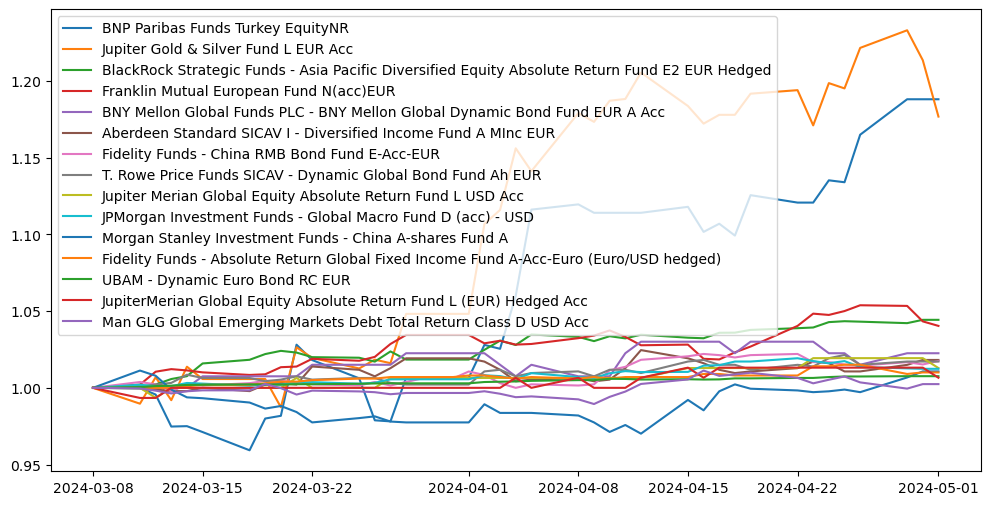

In [85]:
if len(df_portofolio_x[df_portofolio_x['Total Signal']<0].index):
    df_plot = df_quotes[df_portofolio_x[df_portofolio_x['Total Signal']<0].index][-40:]
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.plot()

In [86]:
#####  Portofolio current weigths and performance

print("### Period = {} ".format(df_quotes.index[-last_n]))
mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)
dfi = pd.DataFrame({'w':weights,'name':df_portofolio['Nome'], 'amount':df_portofolio["Amount EUR"]}).reset_index().sort_values(by='w',ascending=False)
#print(dfi)
print("### Curent Performance")
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)


### Period = 2024-04-04 
### Curent Performance
Expected annual return: 22.4%
Annual volatility: 1.3%
Sharpe Ratio: 14.94


(0.22354443616016867, 0.013119882511453232, 14.942545101987632)

### Portfolio Optimization Functions

In [87]:
def new_fund_performance(new_portfolio, new_fund, amount=5000.0, risk_free_rate=risk_free_rate, last_n=last_n, goal='max_sharpe',target=None,weight_bounds = (0,1)):
    if new_fund in new_portfolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_perform.loc[new_fund]['currency'],1,amount,amount]

    mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[new_portfolio.index][-cov_n:]).ledoit_wolf()
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
    if goal=='max_sharpe':
        ef.max_sharpe(risk_free_rate=risk_free_rate)
    elif goal=='min_volatility':
        ef.min_volatility()
    elif goal=='efficient_risk':
        ef.efficient_risk(target_volatility=target)
    elif goal=='efficient_return':
        ef.efficient_return(target_return=target)
    else:
        raise ValueError('Invalid Goal!')
    return new_portfolio, ef.portfolio_performance(risk_free_rate=risk_free_rate)

def new_funds_to_add(df_portofolio, selected_funds, n_funds_to_add, last_n, goal, target=None, verbose=False, weight_bounds = (0,1)):

    mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()

    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
    ef.set_weights(weights)

    current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    max_sharpe = current_sharpe_ratio
    min_volatility = current_volatility
    amount = 10000.0
    funds_to_buy = []
    performance = None

    current_portfolio = df_portofolio.copy()
    for i in range(n_funds_to_add):
        best_fund = None
        for new_fund in selected_funds:
            try:
                _, (new_return,new_volatility,new_sharpe) = new_fund_performance(
                                                    new_portfolio=current_portfolio.copy(),
                                                    new_fund=new_fund,
                                                    last_n=last_n,
                                                    goal=goal,
                                                    target=target)
                if ((goal == 'max_sharpe') or (goal == 'efficient_risk')) and (new_sharpe > max_sharpe):
                    max_sharpe = new_sharpe
                    best_fund = new_fund
                if ((goal == 'min_volatility') or (goal == 'efficient_return')) and (new_volatility < min_volatility):
                    min_volatility = new_volatility
                    best_fund = new_fund
            except Exception as e:
                raise e
                pass
        
        if best_fund is None:
            print("\nNo more Funds found!")
            break
        else:
            funds_to_buy.append(best_fund)
            current_portfolio, performance = new_fund_performance(
                new_portfolio=current_portfolio,
                new_fund=best_fund,
                last_n=last_n,
                goal=goal,
                target=target)
            if verbose:
                print("### Performance with ", best_fund)
                print(df_perform.loc[best_fund][['ft category','name']])
                print(performance)
    return funds_to_buy, performance

def portfolio_strategy(dfi, ef, prev_strategy=None):
    cleaned_weights = ef.clean_weights()
    cleaned_weights = [(s,w) for s,w in cleaned_weights.items()]
    dfo = pd.DataFrame(cleaned_weights,columns=['Code','w']).sort_values(by='w',ascending=False)
    df = pd.merge(dfi,dfo,on=['Code'],how='outer',suffixes=('_i','_o')).fillna(0)
    if prev_strategy is not None:
        df['strategy'] =  df.apply(lambda x: prev_strategy.loc[x['Code']]['strategy'], axis=1)
    else:
        df['strategy'] = 'c'
    df['final_amount'] = df.apply(lambda x: x['amount'] if x['strategy']=='k' else x['w_o']*final_portfolio_amount, axis=1)
    df['change_amount'] = df['final_amount'] - df['amount']

    return df

def strategy(x):
    if x['w_o'] == 0.0:
        return 'sa'
    if x['w_o'] < x['w_i']:
        return 'kp'
    return "i"

### Initialize Parameters

In [88]:
new_portfolio = df_portofolio

n_funds_to_add = 6
max_weight = 0.085

# Trendy funds Filter
ignore_funds = []
trendy_filter = df_perform.index.isin(trendy_funds) & (~df_perform.index.isin(df_portofolio.index)) & df_perform.index.isin(df_quotes.columns) & (~df_perform.index.isin(ignore_funds))
selected_funds = df_perform[trendy_filter].index.tolist()

print(f"Number of Trendy Funds = {len(df_perform[trendy_filter].index)}")

Number of Trendy Funds = 586


### Create the initial Strategy

### Performance with  LU0982776501
ft category                              Spain Equity
name           March International Iberia Class A EUR
Name: LU0982776501, dtype: object
(0.4166875133530122, 0.020443458042344206, 19.037264270403487)
### Performance with  LU2047632166
ft category                               Global Flexible Bond
name           T. Rowe Price Funds SICAV Dynamic Credit Fund A
Name: LU2047632166, dtype: object
(0.3948311165464452, 0.018696910471170863, 19.64662114165013)
### Performance with  LU0067412154
ft category                                         China Equity
name           UBS (Lux) Equity Fund - China Opportunity (USD...
Name: LU0067412154, dtype: object
(0.42981638497997243, 0.020064936694910107, 20.050717881508614)
### Performance with  LU2210151697
ft category                            Equity Market Neutral USD
name           Fidelity Funds - Absolute Return Global Equity...
Name: LU2210151697, dtype: object
(0.40617335866649174, 0.01855445183490600

,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
2,LU0235843108,0.070234,JPM Global Macro Fund D,23697.634646,0.00000,c,0.000000,-23697.634646
4,LU0252500524,0.068203,JPM EUR Money VNAV,23012.185150,0.01037,c,3498.922979,-19513.262171
9,LU0140363267,0.050863,Franklin Mutual European Fund,17161.445280,0.00000,c,0.000000,-17161.445280
3,LU0122614463,0.069586,Franklin Dollar Short Term Money,23478.854475,0.01877,c,6333.151814,-17145.702661
5,LU0132636399,0.067902,UBAM Dynamic Euro Bond,22910.665950,0.02637,c,8897.454094,-14013.211856
0,LU1799936197,0.078169,Pictet TR - Sirius,26374.876495,0.04458,c,15041.657319,-11333.219176
6,LU0788144201,0.064916,Fidelity China RMB Bond,21903.319200,0.03162,c,10668.847116,-11234.472084
7,IE00BLP5S353,0.062181,Jupiter Glb Abs Rt USD,20980.336447,0.03160,c,10662.098952,-10318.237496
8,LU2207571022,0.056177,FF Absolute Return Global Hedged,18954.702000,0.03526,c,11897.012944,-7057.689056
19,IE00B432GG85,0.014550,BNY Mell Glb Dyn Bond A,4909.287200,0.00000,c,0.000000,-4909.287200


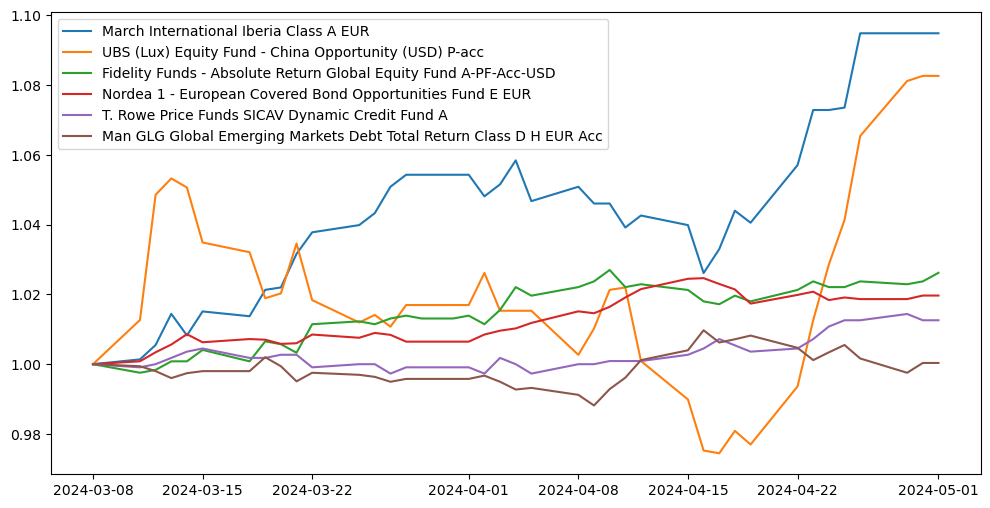

In [89]:
target_return = 0.6

#ignore_funds = ['LU1133289758']
#selected_funds = [x for x in selected_funds if x not in ignore_funds]
#####  Get the funds for the target volatility
funds_to_buy, performance = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=n_funds_to_add,
    last_n=last_n,
    #goal='efficient_return',
    #goal='min_volatility',
    goal='max_sharpe',
    target=target_return,
    verbose=True,
    weight_bounds=(0,max_weight))

new_p = new_portfolio.index.append(pd.Index(funds_to_buy))

mu = mean_historical_return(df_quotes[new_p][-last_n:])
S = CovarianceShrinkage(df_quotes[new_p][-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=(0,max_weight), solver='SCS')
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df_plot = df_quotes[pd.Index(funds_to_buy)][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()
df.sort_values('change_amount')

### Get the revised Strategy, create wight bounds and initialize portofolio amounts

In [92]:
weight_strategy = pd.read_csv('portfolio_changes_strategy.csv',index_col=0)

transaction_limit = 3000.0
weight_bounds = list()
buy_list = list()
#df2 = df.set_index('Code')
for i, code in enumerate(df_quotes[new_p].columns):
    #print(i,code,weight_strategy.loc[code]['strategy'])
    if weight_strategy.loc[code]['strategy'] == 'c':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        #print(i, code, weight_strategy.loc[code]['change_amount'], weight_strategy.loc[code]['w_i'], weight_strategy.loc[code]['w_o'], kw)
        if abs(weight_strategy.loc[code]['change_amount']) < transaction_limit:
            weight_bounds.append((kw,kw)) # Keep
        elif weight_strategy.loc[code]['change_amount'] >= 0.0:
            weight_bounds.append((kw,max_weight)) # keep or buy
        else:
            weight_bounds.append((0.0,kw)) #keep or sell
    elif weight_strategy.loc[code]['strategy'] == 'k':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        weight_bounds.append((kw,kw))
    elif weight_strategy.loc[code]['strategy'] == 'f':
        kw = weight_strategy.loc[code]['final_amount'] / final_portfolio_amount # weight for a fixed amount
        weight_bounds.append((kw,kw))
    else:
        print("Unknown weight_strategy:",weight_strategy.loc[code])
    if weight_strategy.loc[code]['change_amount'] >= 0.0:
        buy_list.append((i,weight_strategy.loc[code]['w_i']))

#buy_list

### Optimize the Target Return for the revised Strategy

In [93]:
target_return = 0.8
mu = mean_historical_return(df_quotes[new_p][-last_n:])
S = CovarianceShrinkage(df_quotes[new_p][-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
# Limit the amount to buy
buy_final_w = (sum([w_i for _,w_i in buy_list])*current_portfolio_amount + amount_to_buy) / final_portfolio_amount
ef.add_constraint(lambda x : sum([x[i] for i,_ in buy_list]) == buy_final_w)
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef,prev_strategy=weight_strategy)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df.sort_values('change_amount')


Expected annual return: 32.6%
Annual volatility: 1.5%
Sharpe Ratio: 19.94


,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
9,LU0140363267,0.050863,Franklin Mutual European Fund,17161.445280,0.00000,c,0.000000,-17161.445280
2,LU0235843108,0.070234,JPM Global Macro Fund D,23697.634646,0.02876,c,9703.859679,-13993.774967
7,IE00BLP5S353,0.062181,Jupiter Glb Abs Rt USD,20980.336447,0.03483,c,11751.927421,-9228.409027
0,LU1799936197,0.078169,Pictet TR - Sirius,26374.876495,0.05108,c,17234.810584,-9140.065911
4,LU0252500524,0.068203,JPM EUR Money VNAV,23012.185150,0.04163,c,14046.303144,-8965.882006
3,LU0122614463,0.069586,Franklin Dollar Short Term Money,23478.854475,0.05012,c,16910.898717,-6567.955757
6,LU0788144201,0.064916,Fidelity China RMB Bond,21903.319200,0.04835,c,16313.686213,-5589.632987
20,IE00BYVJR916,0.012912,Jupiter Gold & Silver Fund,4356.629250,0.00000,c,0.000000,-4356.629250
17,LU1038809395,0.024224,Flossbach Multiple Opportunit,8173.514440,0.02422,c,8172.026475,-1.487965
21,IE00BLP5S460,0.012544,JupiterMerian Absolute Return,4232.572110,0.01254,c,4231.098761,-1.473349


### Best Portofolio from all the funds

In [27]:
### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)

mu = mean_historical_return(df_top[-13:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_top[-13:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df['name'] = df['symbol'].map(df_perform['name'])
best_from_all = df['symbol']
print(df)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)


          symbol        w                                               name
8   LU0213962813  0.09999    HSBC Global Investment Funds - Turkey Equity EC
10  LU0273148055  0.09999    DWS Invest Gold and Precious Metals Equities NC
7   LU0181358762  0.09998           UBAM - Dr. Ehrhardt German Equity RC EUR
4   IE00BLP5S460  0.06714  JupiterMerian Global Equity Absolute Return Fu...
2   IE00BD3B6K23  0.05967  Man GLG Global Emerging Markets Debt Total Ret...
3   IE00BD3B9479  0.05965  Man GLG Global Emerging Markets Debt Total Ret...
17  LU1799936197  0.05859                           Pictet TR - Sirius P USD
18  LU1799936510  0.05849                          Pictet TR - Sirius HP EUR
0   DE000A1T73W9  0.05784                         Acatis Value Event Fonds C
12  LU1089088741  0.05702  Allianz Global Investors Fund - Allianz Floati...
6   LU0140363697  0.05237               Franklin Technology Fund N (Acc) EUR
15  LU1295551573  0.05229         Capital Group New Perspective Fund (LUX) B

(1.9022732251267906, 0.02666015836333026, 70.32115862092736)

### Study Best Return

In [28]:

#min_return, max_return = 0.13, 0.30

result = list()
for tr in np.linspace(min_return, max_return, 13)[1:-2]:
    _, performance = new_funds_to_add(
        df_portofolio=new_portfolio,
        selected_funds=selected_funds, 
        n_funds_to_add=n_funds_to_add,
        last_n=last_n,
        goal='efficient_return',
        target=tr,
        verbose=False,
        weight_bounds=(0,max_weight))
    if performance is not None:
        result.append(performance)
        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()

NameError: name 'min_return' is not defined